# FAI Coursework One - Maze Search [15 Marks]
# Introduction


The main goal of coursework one is to give you first-hand experience on implementing search techniques for solving the problems in Python, one of the mostly adapted high level languages and analytic tools in business and research. The questions are designed to help on your understanding of concept of `problem formulation`, `search algorithms`, `algorithm evluation` and their implementation. 

In completion of this project:

- Students are expected to master the knowledge of formulating maze problem.
- Students are expected to use different search algorithms to solve the `maze` problem.
- Students are expected know how to implement and evluate different **search algorithm**.

## Requirements


In this coursework, you are required to complete the implementation of `maze` problem formulation and some `search` algorithms for the `maze` game. Please use the given code to complete the questions and provide your answer/report in this notebook.


## Marks

Coursework 1 accounts for 15% of the COMP1037 marks. Corresponding marks will be awarded for completing the questions in `FAIcw1_2024.ipynb`. Both **Code** implementation and **report** (text explaination of your design) should be written using this file as the template.

<div class="alert alert-block alert-info">
<b> 1：</b> Write your explaination and evluation using Markdown cell.
</div>

<div class="alert alert-block alert-info">
<b> 2：</b> Use `Code` cell to input your code. 
</div>

<div class="alert alert-block alert-info">
<b> 3：</b> Submit the notebook file `FAIcw1-XXX.ipynb` only.
</div>


## Note

<div class="alert alert-block alert-warning">
<b> a：</b> Please run your code in the notebook and upload your notebook together with all the outputs. 
</div>
<div class="alert alert-block alert-warning">
<b> b：</b> Avoid using problem setting requires more than 5 mins to get the output. 
</div>
<div class="alert alert-block alert-warning">
<b> c：</b> Avoid making any modifications to the three provided modules: maze.py and searchCW.py. Altering these modules will result in a loss of half your marks.
</div>


# Plagiarism vs. Group Discussions

As you should know, there is no tolerance of plagiarism, and any breach of which will be dealt with according to the University's standard policies. Please be very careful not to cross the boundary into plagiarism while having general discussions regarding the coursework to promote the generation of new ideas and to enhance the learning experience. The important part is that when you sit down to actually do the work and write the answers, you do it individually. If you do this, and you truly understand what you have written, you will not be guilty of plagiarism. Do NOT, under any circumstances, share code or share figures, graphs or charts, etc.

# Deadline and submission procedure

The submission deadline is 5pm on the **19  April 2024** via Moodle. Late submission results into a 5% reduction of your coursework mark for each weekday. Any work handed in after the 29th April will receive zero marks.

Name your submission file: <code style="background:yellow;color:black"> FAIcw1-XXX.ipynb, </code> where XXX should be your student number, and submit the single <code style="background:yellow;color:black"> .ipynb or .zip </code>  file via Moodle.

If you can’t submit your coursework on time due to Extenuating Circumstances, please contact your personal tutor first. I am only granting an extension of submission based on his / her recommendation.

## Required libaray installation

Before start the coursework, please install the required library first.

1. If you're using Windows, open the Conda prompt. For macOS users, open the Terminal.

2. Inside the terminal or Conda prompt, ensure you're in the `FAIens` environment, then execute the command: `pip install pygame`. If you encounter any issues during the installation of `pygame`, don't hesitate to seek assistance.

3. Proceed to import the necessary module by utilizing the `import pygame`.

### To quit the pygame object

You can incorporate the following code snippet to gracefully exit the `pygame` window. If you skip this step, you might need to forcibly close the window. Note that once you exit `pygame`, it's necessary to restart the Python kernel and rerun all preceding code from the start to continue working.

```python
import pygame
import os

pygame.init()

# Your code to render the game or visualization in pygame goes here

# Loop to keep the window open and listen for the quit event
run = True
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False

# Properly close the pygame window depending on the operating system
if os.name == 'nt':
    pygame.quit() # For Windows users, use this line to close the window after your operations are complete
else:
    os._exit(0) # For Mac users, use this line to close the window after your operations are complete
```

In [1]:
from maze import *
import pygame
import os
from searchCW import *

pygame 2.5.2 (SDL 2.28.3, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Question 1 [1 Mark]

In the code cell below, initialize a `mazegrid` object with a grid size of 40 by 40, ensuring the random seed is set to 200. This should be based on the instructions and structure provided in `maze.py`.

In [2]:
random.seed(200)  # Set the random seed to 200
maze_grid = MazeGrid(40, 40)  # Initialize a MazeGrid object with size 40 by 40

## Question 2 [3 Marks]

In the `code` cell below, define a subclass of <span style="color:red">Mazetemp</span> named <span style="color:red">Maze</span> and override the existing `actions(self, state)` method. This new `actions` method should return the <span style="color:red">coordinates</span> of <span style="color:red">valid, unvisited neighbours</span> at the given `state` in the maze.

(Hint: A `valid` neighbor is defined as one where there is **no wall** between the current cell and the neighbouring cell.)

In [3]:
class Maze(Mazetemp):
    def actions(self, state):
        """Return a list of valid, unvisited neighbors at the given state."""
        row, col = state
        valid_neighbors = []

        # Check top neighbor
        if row > 0 and not self.grid[row][col].walls["top"] and not self.grid[row - 1][col].visited:
            valid_neighbors.append((row - 1, col))
        
        # Check right neighbor
        if col < self.cols - 1 and not self.grid[row][col].walls["right"] and not self.grid[row][col + 1].visited:
            valid_neighbors.append((row, col + 1))
        
        # Check bottom neighbor
        if row < self.rows - 1 and not self.grid[row][col].walls["bottom"] and not self.grid[row + 1][col].visited:
            valid_neighbors.append((row + 1, col))
        
        # Check left neighbor
        if col > 0 and not self.grid[row][col].walls["left"] and not self.grid[row][col - 1].visited:
            valid_neighbors.append((row, col - 1))

        return valid_neighbors

## Question 3 [2 Marks]

In the `code` cell below, implement the following search algorithms: `dfs` (depth_first_tree_search), `ucs` (uniform_cost_search), `greedy search`(greedy_tree_search), and `A* search` (astar_tree_search), using the `breadth_first_tree_search` example code as your foundation.

In [4]:
def breadth_first_tree_search(problem): 
    "Search shallowest nodes in the search tree first."
    node = Node(problem.initial)
    frontier = FIFOQueue([node]) 
    while frontier: 
        node = frontier.pop() 
        if problem.is_goal(node.state):
            problem.draw_solution_path(node)
            return node
        problem.draw_visited_cell(node) #to draw the visited cell
        for child in expand(problem, node):
            frontier.appendleft(child) 
    return failure

## add your implementation below####
#####################################

def depth_first_tree_search(problem):
    "Search the deepest nodes in the search tree first."
    frontier = [Node(problem.initial)]  # Initialize frontier
    explored = set()  # Set to keep track of explored states

    while frontier:
        node = frontier.pop() # Get the deepest node in the frontier
        if problem.is_goal(node.state):  # Check if the current node is a goal state
            return node # Return the goal node if found
        explored.add(node.state) # Add the current state to the explored set
        for action in problem.actions(node.state): # Iterate over possible actions from the current state
            child_state = problem.result(node.state, action)
            if child_state not in explored: # Check if the state has not been explored
                child_node = Node(child_state, node, action, path_cost=node.path_cost + problem.action_cost(node.state, action, child_state))
                frontier.append(child_node)
    return None 




def uniform_cost_search(problem):
    """Search the node of least total cost first."""
    # Create a priority queue for frontier
    frontier = PriorityQueue()
    frontier.add(Node(problem.initial))
    # Set to keep track of explored states
    explored = set()

    while len(frontier) > 0:
        node = frontier.pop()  # Get the node with the lowest path cost
        if problem.is_goal(node.state):
            return node  # Return the goal node if the goal state is reached
        explored.add(node.state)  # Mark the current state as explored
        for action in problem.actions(node.state):
            child_state = problem.result(node.state, action)
            # If the child state has not been explored
            if child_state not in explored:
                # Create a child node with updated path cost
                # Here, we manually specify the cost as 1 for each action
                child_node = Node(child_state, node, action, node.path_cost + 1)
                frontier.add(child_node)
    return None


def greedy_tree_search(problem):
    """Greedy search is best-first search that evaluates nodes by the heuristic function h."""
    node = Node(problem.initial)
    frontier = PriorityQueue()
    frontier.add((problem.h(node), node))  # Add initial node to frontier with its heuristic value
    explored = set()

    while frontier:
        _, node = frontier.pop()  # Pop the node with the minimum heuristic value
        if problem.is_goal(node.state):
            return node
        explored.add(node.state)
        for child in expand(problem, node):
            if child.state not in explored:
                # Calculate heuristic value for the child node and add it to the priority queue
                frontier.add((problem.h(child), child))
    return None








def astar_search(problem):
    """A* search is a best-first search that evaluates nodes by the sum of the cost to reach the node and
    the heuristic value for the node."""
    # Initialize the start node
    node = Node(problem.initial)
    frontier = PriorityQueue()
    frontier.add(node)  # Add initial node to frontier
    explored = set()  # Set to keep track of explored states

    while frontier:
        node = frontier.pop()  # Pop the node with the lowest priority
        if problem.is_goal(node.state):
            return node
        explored.add(node.state)
        for action in problem.actions(node.state):
            child_state = problem.result(node.state, action)
            # If the child state has not been explored
            if child_state not in explored:
                # Create a child node with updated path cost
                child_node = Node(child_state, node, action, node.path_cost + problem.action_cost(node.state, action, child_state))
                # Calculate priority for the child node (path cost + heuristic value)
                priority = child_node.path_cost + problem.h(child_node)
                frontier.add(child_node)
    return None











## Question 4  [2 Marks]

In the `code` cell below, initialize a `Maze` object with the initial state set to `(0,0)` and the goal state set to `(39,39)`. Use the `mazegrid` object that you previously created in Q1. Solve the maze problem utilizing one of the five search algorithms in Q3.

(Hint: Solving the maze involves displaying both the explored cells and the solution path within the maze window.)

In [5]:
# Initialize the Maze object
maze = Maze((0, 0), (39, 39), maze_grid)

# Solve the maze using one of the search algorithms
solution_node = depth_first_tree_search(maze)  # Change this to any search algorithm you want to use

# Draw the solution path
if solution_node:
    maze.draw_solution_path(solution_node)

## Question 5 [4 Marks]

In the `code` cell below, employ the <span style="color:red">report</span> and <span style="color:red">show_bar</span> methods from `lab3` to produce statistics and visualizations, including the number of nodes discovered, the number of goal tests conducted, the total path cost, and the number of actions taken. This analysis should compare **FIVE** different search algorithms across **THREE** varied problem scenarios. You can initialize a smaller maze size for a quick response, such as 30 by 30, 20 by 20.

(Hint: Variations in problem scenarios may include different **goal states** or **random seeds**.)

depth_first_tree_search:
      940 nodes |      841 goal |     416 path cost |     416 path actions | Grid(40, 40, seed=-1)
      807 nodes |      680 goal |     522 path cost |     522 path actions | Grid(40, 40, seed=-1)
      462 nodes |      387 goal |     330 path cost |     330 path actions | Grid(40, 40, seed=-1)
    2,209 nodes |    1,908 goal |    1268 path cost |   1,268 path actions | TOTAL

uniform_cost_search:
      689 nodes |      637 goal |      50 path cost |      50 path actions | Grid(40, 40, seed=-1)
    1,238 nodes |    1,115 goal |      56 path cost |      56 path actions | Grid(40, 40, seed=-1)
    4,038 nodes |    3,748 goal |      70 path cost |      70 path actions | Grid(40, 40, seed=-1)
    5,965 nodes |    5,500 goal |     176 path cost |     176 path actions | TOTAL

greedy_tree_search:
       86 nodes |       73 goal |      50 path cost |      50 path actions | Grid(40, 40, seed=-1)
       92 nodes |       69 goal |      60 path cost |      60 path action

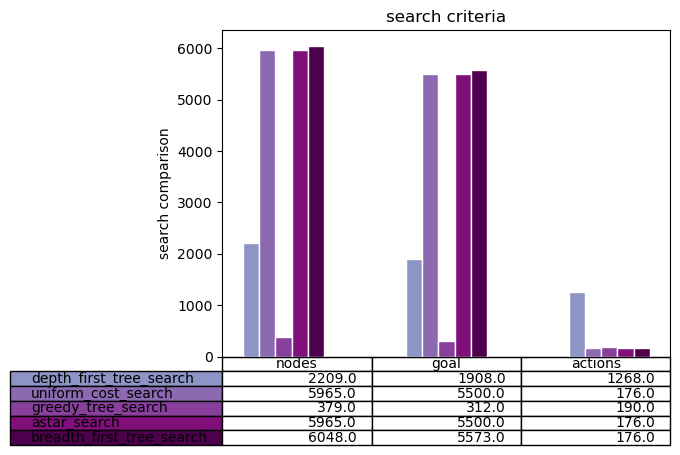

In [ ]:
###############################################
# add your implementation below ###############
###############################################
# Initialize smaller maze sizes for quick response
maze_size = (30, 30)

# Define three different goal states or random seeds for varied problem scenarios
goal_states = [(15, 15), (20, 20), (25, 25)]

# Initialize lists to store problem instances for each goal state
problem_scenarios = []

# Iterate over each goal state to create a problem instance
for goal_state in goal_states:
    # Create a problem instance with the current goal state
    problem_instance = Maze((0, 0), goal_state, maze_grid)
    problem_scenarios.append(problem_instance)

# Define five different search algorithms
search_algorithms = [depth_first_tree_search, uniform_cost_search, greedy_tree_search, astar_search, breadth_first_tree_search]


## Generate statistics and visualizations
statistics = report(search_algorithms, problem_scenarios)
show_bar(statistics)



################################################
################################################
"""code to quit the pygame"""
run = True
while run:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
            
if os.name == 'nt':
    pygame.quit() #if you are windows user, uncomment this line to close the window after the search is done
else:
    os._exit(0) #if you are Mac user, uncomment this line to close the window after the search is done

## Question 6 [3 Marks]. 


In the `markdown` cell below, compose a report of 200 to 300 words to evaluate the performance of five different search algorithms in solving the maze problem.

According to the obtained data, in terms of nodes, Greedy Tree Search has the least number of node expansions, followed by Depth First Tree Search. Then there is A* Search, Uniform Cost Search and Breadth First Tree Search. A smaller number of nodes expands generally means that the algorithm explores the search space more efficiently and may find a solution faster. On the goal side, Greedy Tree Search is likely to be the fastest, since the number of node expansions is closely related to the speed at which the goal is reached. It is followed by Depth First Tree Search, A* Search, Uniform Cost Search and Breadth First Tree Search. Search methods with fewer node expansions usually reach their goals faster. In terms of path cost, Uniform Cost Search and A* Search have the lowest cost, followed by Breadth First Tree Search. Then Greedy Tree Search and Depth First Tree Search. Uniform Cost Search and A* Search can guarantee to find the optimal solution, while Greedy Tree Search and Depth First Tree Search may find the solution with higher cost. In terms of path actions, Depth First Tree searches the most, which may mean that it finds simpler solutions in some cases and more complex ones in others. Greedy Tree Search followed, Breadth First Tree Search ended, and Uniform Cost Search, like A* Search, was minimal, suggesting that they may be more inclined to find higher-quality solutions. If judging only from this topic, the most effective way to observe the bar graph is Greedy Tree Search.

## Question 7* (bonus 3 Marks). 

In the `code` cell below, recreate the  <code style="background:yellow;color:black">Maze</code> class and modify the `action_cost(self, s, a, s1)` method to calculate the action cost based on the number of times the path changes direction. Then, reassess the search algorithms using this updated criterion for path cost.

**OPTIONAL: Up to 3 bonus marks (but overall score cannot exceed 15 marks)**

In [ ]:
class Maze:
    def __init__(self, grid):
        self.grid = grid
        self.num_rows = len(grid)
        self.num_cols = len(grid[0])

    def is_valid_cell(self, row, col):
        return 0 <= row < self.num_rows and 0 <= col < self.num_cols and self.grid[row][col] == 0

    

    def action_cost(self, s, a, s1):
        # Calculate action cost based on direction changes
        direction_changes = 0
        if a == 'U':
            direction_changes += 1 if s[0] - s1[0] != 1 else 0
        elif a == 'D':
            direction_changes += 1 if s[0] - s1[0] != -1 else 0
        elif a == 'L':
            direction_changes += 1 if s[1] - s1[1] != 1 else 0
        elif a == 'R':
            direction_changes += 1 if s[1] - s1[1] != -1 else 0
        return direction_changes


